In [37]:
import pandas as pd

In [38]:
print("hello world")

hello world


In [39]:
# importing certain libraries 
import numpy as np
import tensorflow as tf
from tensorflow import keras
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [4]:
train_samples = []
train_labels = []

In [5]:
for i in range(50):
  # the minority of the youngstres who did experience side effects
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  # the minority of the elders who didnt experience side effects 
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  # the majority of the youngstres who did not experience side effects
  random_youunger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

  # the majority of the elders who did experience side effects 
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)

In [6]:
train_labels = np.array(train_labels) 
train_samples = np.array(train_samples) 
train_labels,train_samples = shuffle(train_labels,train_samples) 

In [7]:
scaler = MinMaxScaler(feature_range= (0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense

In [9]:
model = Sequential([
                    Dense(units = 16,input_shape = (1,), activation = 'relu'),
                    Dense(units = 32,activation= 'relu'),
                    Dense(units = 2,activation = 'softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [11]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer= Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy',metrics = ["accuracy"])

In [12]:
model.fit(x = scaled_train_samples,y = train_labels,batch_size= 10, epochs = 30,shuffle = True,verbose = 2)

Epoch 1/30
210/210 - 0s - loss: 0.6089 - accuracy: 0.6490
Epoch 2/30
210/210 - 0s - loss: 0.3358 - accuracy: 0.9567
Epoch 3/30
210/210 - 0s - loss: 0.2267 - accuracy: 0.9557
Epoch 4/30
210/210 - 0s - loss: 0.2100 - accuracy: 0.9543
Epoch 5/30
210/210 - 0s - loss: 0.2044 - accuracy: 0.9548
Epoch 6/30
210/210 - 0s - loss: 0.1993 - accuracy: 0.9548
Epoch 7/30
210/210 - 0s - loss: 0.1949 - accuracy: 0.9538
Epoch 8/30
210/210 - 0s - loss: 0.1905 - accuracy: 0.9543
Epoch 9/30
210/210 - 0s - loss: 0.1847 - accuracy: 0.9548
Epoch 10/30
210/210 - 0s - loss: 0.1788 - accuracy: 0.9543
Epoch 11/30
210/210 - 0s - loss: 0.1765 - accuracy: 0.9614
Epoch 12/30
210/210 - 0s - loss: 0.1710 - accuracy: 0.9624
Epoch 13/30
210/210 - 0s - loss: 0.1676 - accuracy: 0.9638
Epoch 14/30
210/210 - 0s - loss: 0.1642 - accuracy: 0.9657
Epoch 15/30
210/210 - 0s - loss: 0.1616 - accuracy: 0.9667
Epoch 16/30
210/210 - 0s - loss: 0.1592 - accuracy: 0.9667
Epoch 17/30
210/210 - 0s - loss: 0.1557 - accuracy: 0.9671
Epoch 

In [13]:
# creating a validation set by splitting the train set itself
model.fit(x = scaled_train_samples,y = train_labels, validation_split = 0.1, batch_size= 10, epochs = 30,shuffle = True,verbose = 2)

Epoch 1/30
189/189 - 1s - loss: 0.1327 - accuracy: 0.9704 - val_loss: 0.1552 - val_accuracy: 0.9619
Epoch 2/30
189/189 - 0s - loss: 0.1317 - accuracy: 0.9698 - val_loss: 0.1528 - val_accuracy: 0.9619
Epoch 3/30
189/189 - 0s - loss: 0.1326 - accuracy: 0.9698 - val_loss: 0.1530 - val_accuracy: 0.9619
Epoch 4/30
189/189 - 0s - loss: 0.1307 - accuracy: 0.9709 - val_loss: 0.1536 - val_accuracy: 0.9619
Epoch 5/30
189/189 - 0s - loss: 0.1298 - accuracy: 0.9704 - val_loss: 0.1540 - val_accuracy: 0.9619
Epoch 6/30
189/189 - 0s - loss: 0.1288 - accuracy: 0.9709 - val_loss: 0.1533 - val_accuracy: 0.9619
Epoch 7/30
189/189 - 0s - loss: 0.1273 - accuracy: 0.9709 - val_loss: 0.1492 - val_accuracy: 0.9619
Epoch 8/30
189/189 - 0s - loss: 0.1276 - accuracy: 0.9704 - val_loss: 0.1516 - val_accuracy: 0.9667
Epoch 9/30
189/189 - 0s - loss: 0.1253 - accuracy: 0.9709 - val_loss: 0.1487 - val_accuracy: 0.9619
Epoch 10/30
189/189 - 0s - loss: 0.1257 - accuracy: 0.9714 - val_loss: 0.1466 - val_accuracy: 0.9619

In [14]:
test_samples = []
test_labels = []

In [15]:
for i in range(10):
  # the minority of the youngstres who did experience side effects
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

  # the minority of the elders who didnt experience side effects 
  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(00):
  # the majority of the youngstres who did not experience side effects
  random_youunger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)

  # the majority of the elders who did experience side effects 
  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)

In [16]:
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)

In [17]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [18]:
predictions = model.predict(scaled_test_samples,batch_size= 10, verbose = 0)

In [19]:
for i in predictions :
  print(i)
# having no side effects   # having a side effect

[0.02171143 0.97828853]
[0.037016   0.96298397]
[0.0573016  0.94269836]
[0.01998826 0.9800118 ]
[0.0028371 0.9971629]
[0.02867204 0.97132796]
[0.09969426 0.90030575]
[0.03018    0.96981996]
[9.8320760e-04 9.9901676e-01]
[0.07823884 0.92176116]
[0.91338766 0.08661231]
[0.04766902 0.95233095]
[0.12670411 0.8732959 ]
[0.02457424 0.9754258 ]
[9.8320760e-04 9.9901676e-01]
[0.02216562 0.97783434]
[0.00104929 0.9989507 ]
[0.0210494  0.97895056]
[0.38139448 0.6186055 ]
[0.07451407 0.9254859 ]


In [20]:
rounded_predictions = np.argmax(predictions,axis = 1)
rounded_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [21]:
for i in rounded_predictions:
  print(i)

1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1


In [22]:
model.get_weights()

[array([[-0.49708775, -0.47083092,  0.8657104 ,  0.6450592 ,  0.6145963 ,
         -0.52975655, -0.22910666,  0.6220662 ,  0.5517516 ,  0.4974972 ,
         -0.04192907, -0.17358422,  0.77371174, -0.5552147 , -0.2656875 ,
         -0.26867172]], dtype=float32),
 array([ 0.        ,  0.        , -0.26499087, -0.21332563, -0.20097853,
         0.        ,  0.        , -0.07567296, -0.18073425, -0.16186371,
         0.        ,  0.        , -0.23608838,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[ 6.44895732e-02, -1.41766563e-01,  2.68439054e-02,
          3.03898007e-01,  3.10408324e-01,  1.42166376e-01,
          2.27634341e-01,  6.54079318e-02,  2.21654505e-01,
         -5.21105230e-02, -9.33325887e-02,  4.45712209e-02,
         -1.17698446e-01,  2.43023783e-01,  1.02425188e-01,
          1.50865406e-01,  2.22368628e-01,  1.32072210e-01,
         -2.67452896e-02,  2.27720171e-01, -2.43574560e-01,
         -1.86372399e-02, -3.41587812e-01, -3.37284714e-01,
 

In [23]:
model.optimizer

CATS VS DOGS 

Data Preparation

In [24]:
import os
import glob
print(os.getcwd())
os.chdir("C:\\Users\\DELL\\Downloads\\dogs-vs-cats")
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    print(glob.glob("cat*"))
    for i in random.sample(glob.glob('cat*'), 500):
        shutil.move(i, 'train/cat')      
    for i in random.sample(glob.glob('dog*'), 500):
        shutil.move(i, 'train/dog')
    for i in random.sample(glob.glob('cat*'), 100):
        shutil.move(i, 'valid/cat')        
    for i in random.sample(glob.glob('dog*'), 100):
        shutil.move(i, 'valid/dog')
    for i in random.sample(glob.glob('cat*'), 50):
        shutil.move(i, 'test/cat')      
    for i in random.sample(glob.glob('dog*'), 50):
        shutil.move(i, 'test/dog')
    print("end")
os.chdir('../../') 

C:\Users\DELL\Downloads


In [25]:
for i in random.sample(glob.glob('cat*'), 500):
    shutil.move(i, 'train/cat')      
for i in random.sample(glob.glob('dog*'), 500):
    shutil.move(i, 'train/dog')
for i in random.sample(glob.glob('cat*'), 100):
    shutil.move(i, 'valid/cat')        
for i in random.sample(glob.glob('dog*'), 100):
    shutil.move(i, 'valid/dog')
for i in random.sample(glob.glob('cat*'), 50):
    shutil.move(i, 'test/cat')      
for i in random.sample(glob.glob('dog*'), 50):
    shutil.move(i, 'test/dog')
print("end")

ValueError: Sample larger than population or is negative

In [26]:
train_path = "Downloads/dogs-vs-cats/train"
valid_path = "Downloads/dogs-vs-cats/valid"
test_path = "Downloads/dogs-vs-cats/test"

In [27]:

# target_size => resizes the images to a same constant size 
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 902 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 101 images belonging to 2 classes.


In [28]:
assert train_batches.n == 902
assert valid_batches.n == 400
assert test_batches.n == 101
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [29]:
print(train_batches)

In [30]:
imgs, labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

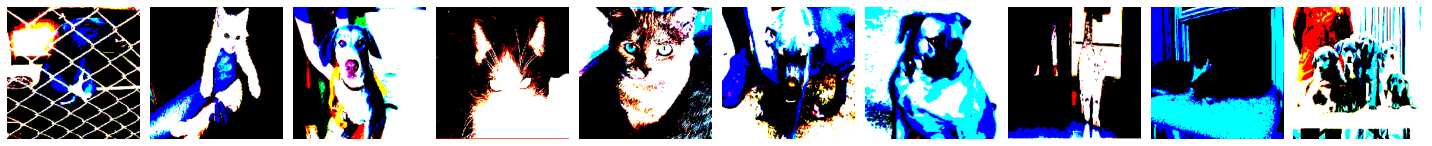

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [31]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)

In [32]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", padding = 'same', input_shape = (224,224,3)),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", padding = 'same'),
    MaxPool2D(pool_size = (2,2), strides= 2),
    Flatten(),
    Dense(units = 2, activation = 'softmax')
])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

In [34]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [36]:
# there is no need to specify y, cuz the data is actually stored in a generator and it itself contains both the x and y 
model.fit(x = train_batches,validation_data = valid_batches, epochs = 10,verbose = 2)

Epoch 1/10
91/91 - 434s - loss: 3.0862 - accuracy: 0.7483 - val_loss: 3.3085 - val_accuracy: 0.6575
Epoch 2/10
91/91 - 432s - loss: 0.8460 - accuracy: 0.8825 - val_loss: 4.3557 - val_accuracy: 0.5500
Epoch 3/10
91/91 - 458s - loss: 0.1545 - accuracy: 0.9690 - val_loss: 2.9548 - val_accuracy: 0.6275
Epoch 4/10
91/91 - 453s - loss: 0.0146 - accuracy: 0.9956 - val_loss: 4.0946 - val_accuracy: 0.5650
Epoch 5/10
91/91 - 449s - loss: 0.0055 - accuracy: 1.0000 - val_loss: 3.7525 - val_accuracy: 0.5800
Epoch 6/10
91/91 - 470s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.4026 - val_accuracy: 0.6100
Epoch 7/10
91/91 - 419s - loss: 6.0644e-04 - accuracy: 1.0000 - val_loss: 3.5942 - val_accuracy: 0.5925
Epoch 8/10
91/91 - 1267s - loss: 4.6052e-04 - accuracy: 1.0000 - val_loss: 3.6152 - val_accuracy: 0.5925
Epoch 9/10
91/91 - 1543s - loss: 3.9591e-04 - accuracy: 1.0000 - val_loss: 3.6480 - val_accuracy: 0.5950
Epoch 10/10
91/91 - 1395s - loss: 3.5377e-04 - accuracy: 1.0000 - val_loss: 3.6013 - v

In [ ]:
# in thee above code we can see that when the n of epohs surpass a certain limit the accuracy 
# starts to fall . This is due to overfitting the mode. The accuracy of the train set has reached 100 % 
# but the validation accuracy has actually decreased in comparison. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

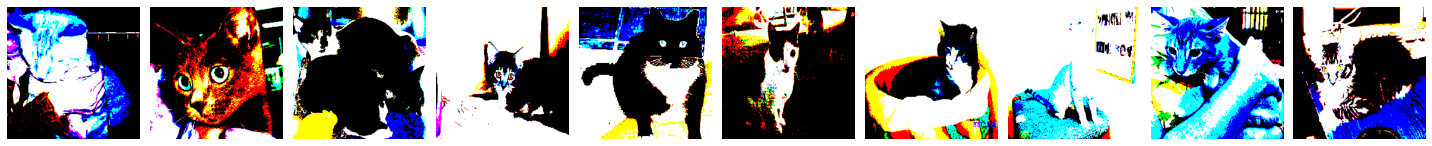

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [35]:
test_images,test_labels = next(test_batches)
plotImages(test_images)
print(test_labels)

In [ ]:
test_batches.classes

In [38]:
predictions = model.predict(x = test_batches, verbose = 0)

In [39]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [40]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions,axis = 1))

In [43]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [41]:
cm

array([[38, 12],
       [28, 23]], dtype=int64)

In [42]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[38 12]
 [28 23]]


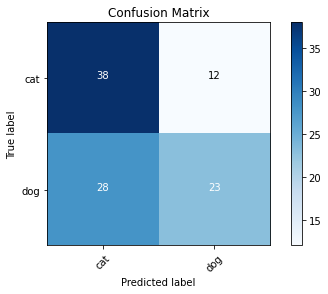

In [44]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
### lets try another state of the art model known as vgg16.
## the colour data that we plot is actually skewed and distorted because of this  model itself
### we compute the mean Red value from each image in the training set and then subtract it from the images Red value.
### similarly we do it for green and blue too.
### This is how VGG16 is initially trained.
### Keras has already VGG16 inbuilt and thus it makes processing images easier.

In [46]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 129s 0us/step


In [47]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [48]:
type(vgg16_model)
# functional models are more complicated thana sequenial models

tensorflow.python.keras.engine.functional.Functional

In [50]:
### originally this model canpredict upto 1000 outputs, check the last layer
# we are gonna modify this model so that we can have inly 2 outputs
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [51]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
### Now we want to iterate over all the layers over the sequential model by setting them to be untrainable
###freezing the weights and biases in the model
### cuz we dont want it to go through more training 
### VGG16 has already learned features of cats and dogs and thus we do this

In [52]:
for layer in model.layers:
    layer.trainable = False

In [53]:
model.add(Dense(units = 2,activation = 'softmax'))

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
### now we have 8k trainable parameters
### this will help reduce the training time

In [56]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
# this is just tooo heavy a wrokload for my laptop, howewer the code is absolutely correct 
#the accuracy reaches its peak at 98% in the second epocj and it looks that it starts overfitting from there till 4th at least
#model.fit(x=train_batches,validation_data=valid_batches,epochs=2,verbose=2) 